In [1]:
!pip install ultralytics &> /dev/null

# **Loading Dependencies**

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display

import os
import shutil
import tqdm
import random

# **Loading Data and Spliting It**

In [3]:
root_dir = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection'

In [4]:
data_dir = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotation_path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/Annotations_txt/'

In [5]:
train = []
with open(os.path.join(root_dir, 'ImageSets/Main/trainval.txt'), 'r') as f:
    train = [line.strip() for line in f.readlines()]

test = []
with open(os.path.join(root_dir, 'ImageSets/Main/test.txt'), 'r') as f:
    test = [line.strip() for line in f.readlines()]

In [6]:
train_image_dir = os.path.join('train', 'images')
train_label_dir = os.path.join('train', 'labels')
test_image_dir = os.path.join('test', 'images')
test_label_dir = os.path.join('test', 'labels')

os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

In [7]:
def copy_files(file_list, src_img_dir, src_anno_dir, dst_img_dir, dst_anno_dir):
    for filename in tqdm.tqdm(file_list):
        img_src = os.path.join(src_img_dir, filename + '.jpg')
        anno_src = os.path.join(src_anno_dir, filename + '.txt')
        img_dst = os.path.join(dst_img_dir, filename + '.jpg')
        anno_dst = os.path.join(dst_anno_dir, filename + '.txt')

        if os.path.exists(img_src) and os.path.exists(anno_src):
            shutil.copyfile(img_src, img_dst)
            shutil.copyfile(anno_src, anno_dst)

In [8]:
# Copy training data
print('Copying Train Data..!!')
copy_files(train, data_dir, annotation_path, train_image_dir, train_label_dir)

# Copy testing data
print('Copying Test Data..!!')
copy_files(test, data_dir, annotation_path, test_image_dir, test_label_dir)

print("Data copying completed successfully!")

Copying Train Data..!!


100%|██████████| 2145/2145 [00:30<00:00, 70.26it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:07<00:00, 76.54it/s]

Data copying completed successfully!


# **Visualizing Data**

In [9]:
def convert(size, x, y, w, h):
    box = np.zeros(4)
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = x / dw
    w = w / dw
    y = y / dh
    h = h / dh
    box[0] = x - (w / 2.0)
    box[1] = x + (w / 2.0)
    box[2] = y - (h / 2.0)
    box[3] = y + (h / 2.0)
    return box

def plot_annotations(img, filename, annotation_path):
    with open(os.path.join(annotation_path, filename), 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
            
            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x, y, w, h)
            cv2.rectangle(img, (int(round(bb[0])), int(round(bb[2]))), 
                          (int(round(bb[1])), int(round(bb[3]))), (255, 0, 0), 2)
    plt.axis('off')
    plt.imshow(img)


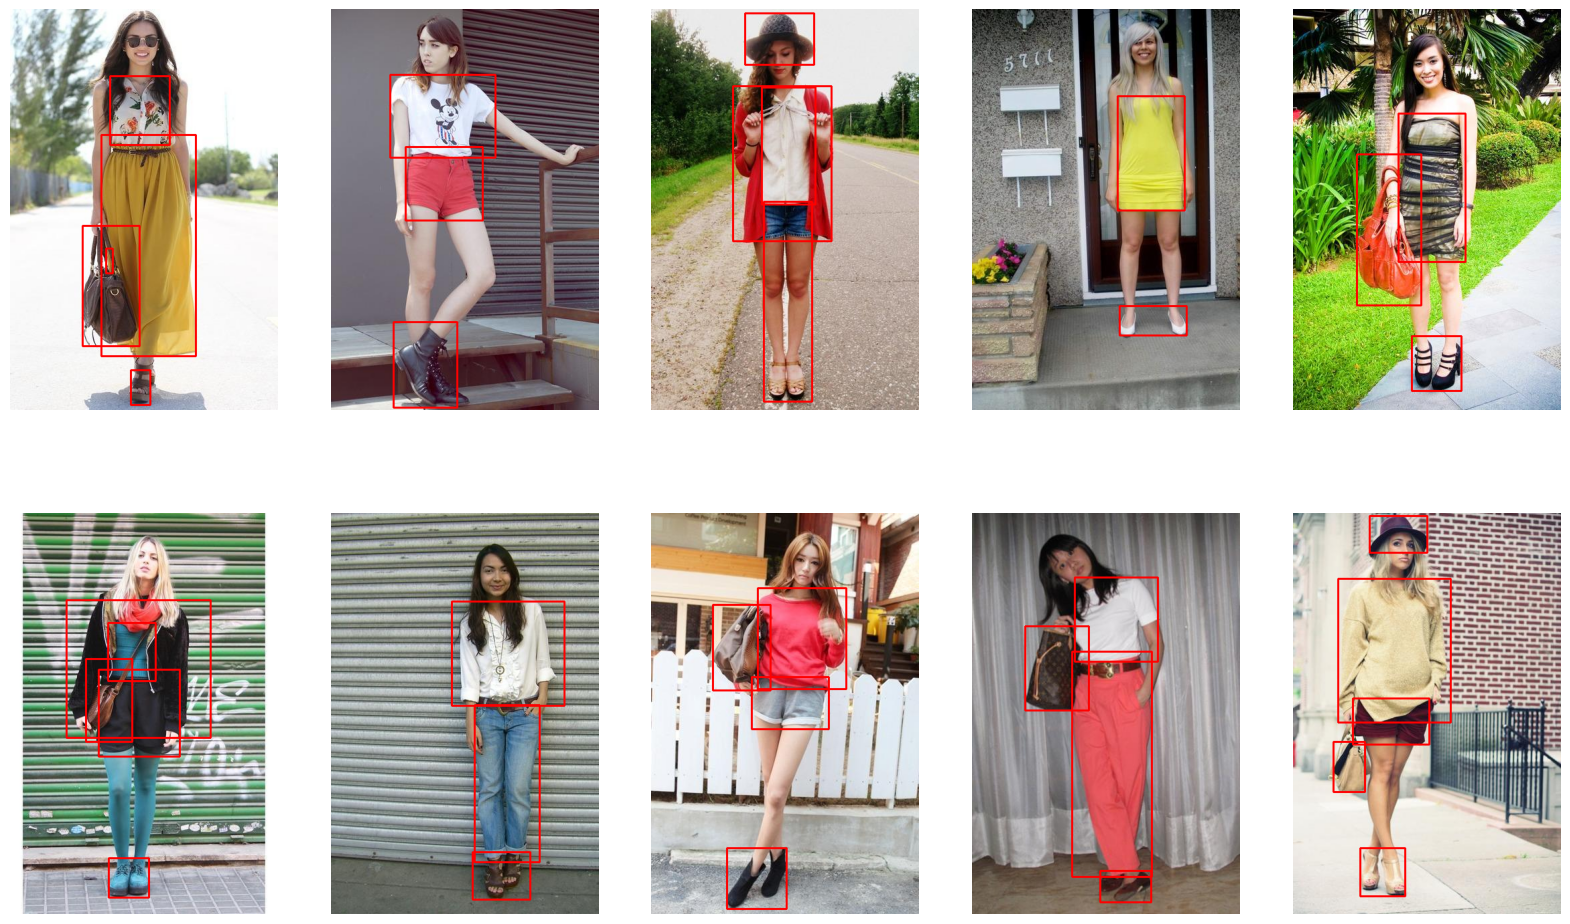

In [10]:
import random

plt.figure(figsize=(20, 12))
ls = os.listdir(data_dir)
c = 1
for i in random.sample(ls, 10):
    if i.endswith('.jpg'):
        img = plt.imread(os.path.join(data_dir, i))
        img = np.copy(img)  # Create a writable copy of the image
        i = i.replace('.jpg', '.txt')
        plt.subplot(2, 5, c)
        plot_annotations(img, i, annotation_path)
        c += 1
plt.show()

# **Model Training**

In [11]:
data = """
train: /kaggle/working/train
val: /kaggle/working/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(data)

In [12]:
!wandb disabled

W&B disabled.


In [13]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)

100%|██████████| 49.7M/49.7M [00:00<00:00, 215MB/s]


Ultralytics YOLOv8.2.17 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]
2024-05-18 14:35:37,538	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-18 14:35:38,861	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 70.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1264.26it/s]


train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 1395.98it/s]


val: New cache created: /kaggle/working/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      7.23G      1.315      1.839      1.411         10        640: 100%|██████████| 135/135 [01:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]

                   all        537       2035      0.614      0.688      0.672      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      7.21G      1.242      1.221      1.356          4        640: 100%|██████████| 135/135 [01:08<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]

                   all        537       2035      0.652      0.694      0.689      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      7.18G      1.216      1.147      1.346          9        640: 100%|██████████| 135/135 [01:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]

                   all        537       2035      0.693       0.72      0.726      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      7.08G      1.178      1.021      1.323          9        640: 100%|██████████| 135/135 [01:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]

                   all        537       2035      0.715      0.751      0.762      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      7.16G      1.112      0.917      1.275          7        640: 100%|██████████| 135/135 [01:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]

                   all        537       2035      0.749      0.761      0.785      0.536



5 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.17 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.94it/s]


                   all        537       2035      0.749      0.761      0.785      0.535
              sunglass        537         82      0.738      0.172      0.354      0.125
                   hat        537         77      0.773      0.727      0.792      0.479
                jacket        537        181      0.816      0.786      0.876      0.674
                 shirt        537        366      0.723      0.872      0.843      0.611
                 pants        537        114      0.786      0.947      0.965      0.764
                shorts        537        107      0.773      0.891      0.806      0.522
                 skirt        537        186      0.729      0.844      0.836      0.657
                 dress        537        128      0.676      0.831      0.795      0.618
                   bag        537        274      0.729      0.723      0.764      0.423
                  shoe        537        520      0.748      0.821      0.821       0.48
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d54701f0d30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

# **Prediction**

In [14]:
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(data_dir), 1)
c=1
for img in imgs:
    i=model.predict(source=data_dir+img, conf=0.4, save=True, line_width=2)

    im = plt.imread('/kaggle/working/runs/detect/train212/'+img)
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1


image 1/1 /kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/120874.jpg: 640x448 1 shirt, 1 shorts, 1 bag, 1 shoe, 105.4ms
Speed: 1.9ms preprocess, 105.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train2


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train212/120874.jpg'

<Figure size 2000x2000 with 0 Axes>

# **Evaluation Metrics**

In [ ]:
%matplotlib inline
model_path = 'runs/detect/train3/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

**With a dash of inspiration from Rohit's notebook**